# Setup

# Setup

In [1]:
!pip install pyarrow

In [73]:
import numpy as np 
import pyarrow
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns

In [57]:
number_of_bootstrap_samples = 500
percentile_method_alpha = 0.05

## Create Original Dataframe

In [3]:
df_original_data = pd.read_csv('../Data/haircut.csv')

## Original Dataframe Parameters

In [4]:
original_data_mean = df_original_data.mean()['Response (In Dollars)']

In [5]:
original_data_std_dev = df_original_data.std()['Response (In Dollars)']

## Create Bootstrap Sample Dataframe and Generate Samples

In [21]:
# Define a function that will sample, with replacement, from the original sample for the prescribed number of times.
def generage_bootstrap_samples(data):
    return np.random.choice(data, size=len(data), replace=True)

In [15]:
# Create our empty dataframe.
df_bootstrap_samples = pd.DataFrame(index=range(len(df_original_data)), columns=[f'Bootstrap Sample {i+1}' for i in range(number_of_bootstrap_samples)])

In [22]:
# Generate our samples.
for i in range(number_of_bootstrap_samples):
    bootstrap_sample_values = generage_bootstrap_samples(df_original_data['Response (In Dollars)'])
    df_bootstrap_samples[f'Bootstrap Sample {i+1}'] = bootstrap_sample_values

In [23]:
df_bootstrap_samples

,Bootstrap Sample 1,Bootstrap Sample 2,Bootstrap Sample 3,Bootstrap Sample 4,Bootstrap Sample 5,Bootstrap Sample 6,Bootstrap Sample 7,Bootstrap Sample 8,Bootstrap Sample 9,Bootstrap Sample 10,...,Bootstrap Sample 491,Bootstrap Sample 492,Bootstrap Sample 493,Bootstrap Sample 494,Bootstrap Sample 495,Bootstrap Sample 496,Bootstrap Sample 497,Bootstrap Sample 498,Bootstrap Sample 499,Bootstrap Sample 500
0,96,36,170,35,87,44,50,0,0,65,...,170,44,65,65,65,170,50,65,50,170
1,170,48,65,0,25,50,50,25,25,65,...,96,36,170,170,0,0,87,87,100,50
2,0,35,100,50,65,170,35,0,65,50,...,50,35,65,96,44,100,0,96,48,50
3,100,44,87,170,65,170,25,170,0,0,...,96,96,65,100,25,25,65,25,0,65
4,36,87,48,25,44,87,36,36,25,65,...,36,25,65,25,35,50,25,36,65,87
5,96,35,100,65,44,100,65,50,36,0,...,0,170,87,48,65,0,50,65,65,44
6,0,100,25,36,36,25,36,170,48,65,...,87,87,44,35,35,25,50,44,0,25
7,50,87,44,170,25,35,100,48,0,170,...,36,96,96,100,0,87,87,65,48,0
8,25,65,87,25,0,25,48,87,25,170,...,65,100,96,100,170,25,65,48,65,48
9,50,25,36,65,50,35,50,100,65,35,...,25,0,65,25,100,100,35,25,0,48


In [24]:
df_bootstrap_samples.to_csv('../Data/bootstrap_samples.csv')

## Generate Percentile Method Parameters

In [25]:
# Create our dataframe
df_parameter_estimates_percentile = pd.DataFrame(index=range(1, number_of_bootstrap_samples + 1), columns=['Original Index', 'Sample Mean', 'Sample Mean Rank', 'Sample Standard Deviation', 'Sample Standard Deviation Rank'])

In [31]:
# Populate the DataFrame with the parameter values.
for i in range(1, number_of_bootstrap_samples + 1):
    # Get the i-th bootstrap sample from our bootstrap samples dataframe.
    bootstrap_sample = df_bootstrap_samples[f'Bootstrap Sample {i}']
    
    # Calculate the sample parameters.
    sample_mean = bootstrap_sample.mean()
    sample_standard_deviation = bootstrap_sample.std()
    
    # Populate DataFrame
    df_parameter_estimates_percentile.loc[i, 'Original Index'] = i
    df_parameter_estimates_percentile.loc[i, 'Sample Mean'] = sample_mean
    df_parameter_estimates_percentile.loc[i, 'Sample Standard Deviation'] = sample_standard_deviation

## Rank Order Percentile Parameter Values

In [41]:
# Rank order the sample means
df_parameter_estimates_percentile.sort_values(by='Sample Mean', inplace=True)
df_parameter_estimates_percentile['Sample Mean Rank'] = range(1, number_of_bootstrap_samples + 1)
df_parameter_estimates_percentile.sort_values(by='Original Index', inplace=True)

In [50]:
# Rank order the sample standard deviations
df_parameter_estimates_percentile.sort_values(by='Sample Standard Deviation', inplace=True)
df_parameter_estimates_percentile['Sample Standard Deviation Rank'] = range(1, number_of_bootstrap_samples + 1)
df_parameter_estimates_percentile.sort_values(by='Original Index', inplace=True)

In [56]:
# I want to verify that the minimum / maximum rank counts are 1, 500 as desired

# Get the minimum values for each column
min_values = df_parameter_estimates_percentile.min()

# Get the maximum values for each column
max_values = df_parameter_estimates_percentile.max()

print("Minimum values:")
print(min_values)

print("\nMaximum values:")
print(max_values)


Minimum values:
Original Index                            1
Sample Mean                            32.0
Sample Mean Rank                          1
Sample Standard Deviation         20.233871
Sample Standard Deviation Rank            1
dtype: object

Maximum values:
Original Index                          500
Sample Mean                            90.0
Sample Mean Rank                        500
Sample Standard Deviation         65.004908
Sample Standard Deviation Rank          500
dtype: object


In [64]:
lower_percentile_rank_value = int(np.floor(number_of_bootstrap_samples*(percentile_method_alpha/2) + 1))
upper_percentile_rank_value = int(np.floor(number_of_bootstrap_samples*(1 - percentile_method_alpha/2) + 1))

print(f'Percentile Method Alpha Value: {percentile_method_alpha}.')
print(f'Lower Percentile Rank Value: {lower_percentile_rank_value}.')
print(f'Upper Percentile Rank Value: {upper_percentile_rank_value}.')

Percentile Method Alpha Value: 0.05.
Lower Percentile Rank Value: 13.
Upper Percentile Rank Value: 488.


In [68]:
lower_percentile_sample_mean = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Mean Rank'] == lower_percentile_rank_value]['Sample Mean'].values[0]
lower_percentile_sample_mean_original_index_value = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Mean Rank'] == lower_percentile_rank_value]['Original Index'].values[0]
upper_percentile_sample_mean = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Mean Rank'] == upper_percentile_rank_value]['Sample Mean'].values[0]
upper_percentile_sample_mean_original_index_value = df_parameter_estimates_percentile[df_parameter_estimates_percentile['Sample Mean Rank'] == upper_percentile_rank_value]['Original Index'].values[0]

print(f'Percentile Method Confidence Interval: ({lower_percentile_sample_mean},{upper_percentile_sample_mean}).')
print(f'Lower Value Original Index: {lower_percentile_sample_mean_original_index_value}.')
print(f'Upper Value Original Index: {upper_percentile_sample_mean_original_index_value}.')

Percentile Method Confidence Interval: (37.53333333333333,77.93333333333334).
Lower Value Original Index: 147.
Upper Value Original Index: 300.


## Graph The Outcomes

In [70]:
print(df_parameter_estimates_percentile.columns)

Index(['Original Index', 'Sample Mean', 'Sample Mean Rank',
       'Sample Standard Deviation', 'Sample Standard Deviation Rank'],
      dtype='object')


/home/codespace/.local/lib/python3.10/site-packages/seaborn/_base.py:1608: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


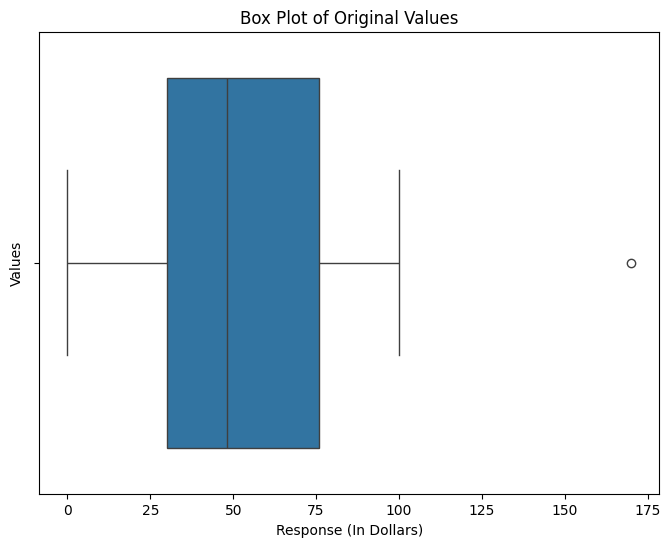

In [75]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_original_data['Response (In Dollars)'], orient='v')


plt.ylabel('Values')
plt.title('Box Plot of Original Values')

plt.show()


## Whitespace

In [66]:
df_parameter_estimates_percentile

,Original Index,Sample Mean,Sample Mean Rank,Sample Standard Deviation,Sample Standard Deviation Rank
1,1,64.733333,389,52.326539,440
2,2,64.733333,390,28.636806,61
3,3,69.333333,447,38.038827,181
4,4,57.466667,278,48.466287,381
5,5,48.533333,112,23.335646,10
...,...,...,...,...,...
496,496,57.066667,269,56.49332,484
497,497,64.8,392,39.918131,203
498,498,45.933333,77,25.880127,33
499,499,46.466667,80,35.381324,150


In [15]:
original_data_mean

56.4

In [19]:
original_data_std_dev

43.85984170383785

In [11]:
df_original_data.columns[1]

'Response (In Dollars)'